상관분석은 두 변수가 함께 움직이는 정도를 숫자로 요약해 관계의 방향과 강도를 확인하는 절차/
데이터 간 연관성을 빠르게 파악할 수 있지만, 인관간계를 증명하지는 않는다.

In [2]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np


In [4]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [6]:
origin = load_data("language_math_scores")

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print("\n===== 타입확인 =====")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab11_/language_math_scores.xlsx
[desc] 어느 학급의 언어영역과 수리영역 점수를 기록한 가상의 데이터 셋

field     type    description
--------  ------  -------------
언어영역  INT     언어영역 점수
수리영역  INT     수리영역 점수


===== 데이터 크기 확인 =====
데이터셋 크기: (50, 2)
열 개수: 2
행 개수: 50

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   언어영역    50 non-null     int64
 1   수리영역    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


,언어영역,수리영역
0,66,66
1,58,70
2,73,74
3,52,58
4,72,79


# 탐색적 데이터 분석

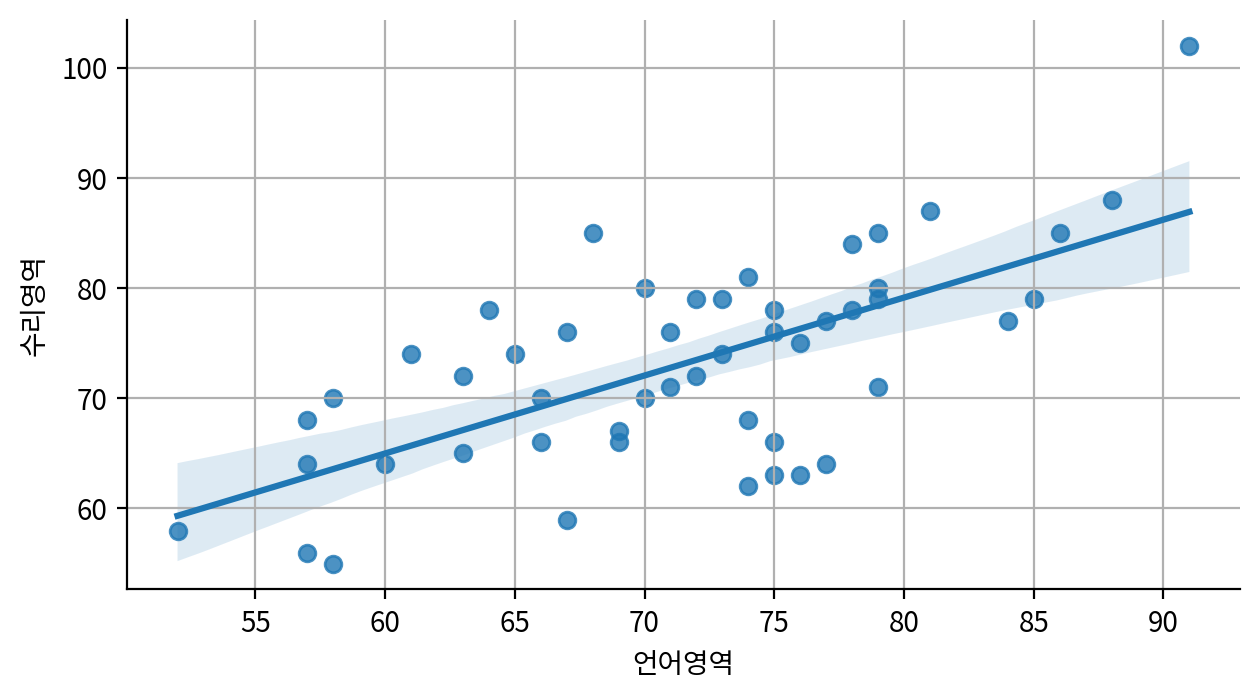

In [9]:
width_px = 1280
height_px = 720
figsize = (width_px/ my_dpi, height_px/ my_dpi)

#LM Plot 그리기
g = sb.lmplot(data = origin, x='언어영역', y = '수리영역')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()


plt.tight_layout()
plt.show()
plt.close()

# 공분산

2개의 확률변수의 상관정도를 나타내는 값/
x의 편차와 y의 편차를 곱한 것의 평균(x=y이면 분산과 같음)

파이썬에서는 numpy패키지의 cov()사용하여 공분산 값을 구할 수 있다.

공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 파악하기에는 한계가 있다.
결과값이 양수면 정비례, 음수면 반비례
그래서 잘 안쓴다.
2차원 배열이 리턴되는데 이 중에서 공분산 값은 0행1열혹은 1행0열의 값이다.

In [11]:
c = np.cov(origin['언어영역'], origin['수리영역'])
c

array([[76.86693878, 54.39020408],
       [54.39020408, 85.57714286]])

In [12]:
"공분산: {0}".format(c[0][1])

'공분산: 54.390204081632646'

* : 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나도 증가)
- : 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하나는 감소)

-공분산이 0이라도 완전히 독립이라고 단정할 수는 없다. (비선형 관계일 수 있음)
-공분산의 크기가 클 수록 두 변수는 함께 많이 변화하며 단위에 따라 공분산의 크기가 달라지므
로 절대적 크기로 판단이 어려움
-공분산은 선형적인 관계를 측정하기 때문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정
하지 못함